In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
x = dataset.iloc[:, [3, 4]].values
dataset.head()

,NoPeers,Endorsing,MaxDelay,MinDelay,AvgDelay,IsTrustable
0,20,20,98,28,67.85,1
1,20,20,99,23,58.90,0
2,20,20,89,29,67.95,1
3,20,20,99,21,60.00,1
4,20,20,98,25,62.45,0


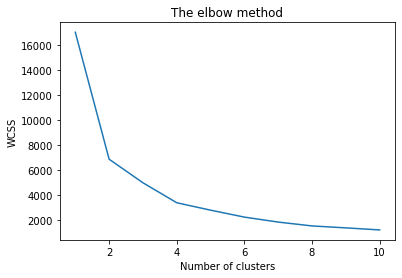

In [2]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [3]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

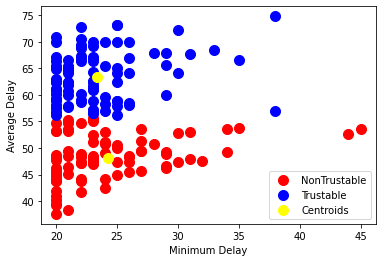

In [4]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'NonTrustable')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Trustable')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Minimum Delay')
plt.ylabel('Average Delay')
plt.legend()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
#importing the Iris dataset with pandas
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
x = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, [5]]
dataset.head()

,NoPeers,Endorsing,MaxDelay,MinDelay,AvgDelay,IsTrustable
0,20,20,98,28,67.85,1
1,20,20,99,23,58.90,0
2,20,20,89,29,67.95,1
3,20,20,99,21,60.00,1
4,20,20,98,25,62.45,0


In [6]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

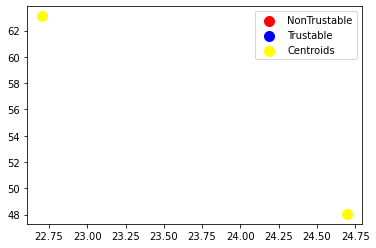

In [7]:
#Visualising the clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(X_train)
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'NonTrustable')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Trustable')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [8]:
#k_means = cluster.KMeans(n_clusters=2)
import sklearn.metrics as metrics
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(X_train)
#y_kmeans = kmeans.fit_predict(x)
print(kmeans.labels_[:])
print(y_train[:])
print(kmeans.predict(X_test))
score = metrics.accuracy_score(y_test,kmeans.predict(X_test))
print('Accuracy:{0:f}'.format(score))



[1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1]
     IsTrustable
1              0
67             1
172            0
64             1
20             1
..           ...
148            0
137            0
156            1
15             1
99             0

[140 rows x 1 columns]
[0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1]
Accuracy:0.305556
